In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data exploration

In [3]:
df = pd.read_csv("./movies.csv")
# dataframe overview
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# to check various columns present in the dataset
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
# to check if there is any row empty
for i in df.columns:    
    if df[i].isna().sum() != 0:
        print(i, " has ",df[i].isna().sum(), " rows empty")

rating  has  77  rows empty
released  has  2  rows empty
score  has  3  rows empty
votes  has  3  rows empty
writer  has  3  rows empty
star  has  1  rows empty
country  has  3  rows empty
budget  has  2171  rows empty
gross  has  189  rows empty
company  has  17  rows empty
runtime  has  4  rows empty


In [13]:
# Count 0f Unique values in each column
for i in df.columns:
    print(" Count of unique values of " + i + " are " + str(len(df[i].unique())))

 Count of unique values of name are 7512
 Count of unique values of rating are 13
 Count of unique values of genre are 19
 Count of unique values of year are 41
 Count of unique values of released are 3415
 Count of unique values of score are 73
 Count of unique values of votes are 937
 Count of unique values of director are 2949
 Count of unique values of writer are 4536
 Count of unique values of star are 2815
 Count of unique values of country are 60
 Count of unique values of budget are 414
 Count of unique values of gross are 7473
 Count of unique values of company are 2386
 Count of unique values of runtime are 139


In [15]:
# to obtain index of all the rows of rating column where values is NaN if present
k = df[df.rating.isna() == True].index
k

Int64Index([  78,   91,  102,  298,  464,  474,  505,  638,  839,  842,  923,
            1019, 1224, 1231, 1381, 1601, 1837, 1852, 2041, 2169, 2194, 2311,
            2313, 2417, 2840, 2989, 3081, 3114, 3180, 3332, 3368, 3446, 3542,
            3787, 3817, 3826, 3838, 3890, 3944, 3958, 4283, 4376, 4420, 4615,
            5185, 6703, 6823, 6837, 6983, 7186, 7436, 7578, 7605, 7609, 7614,
            7615, 7617, 7618, 7619, 7623, 7625, 7628, 7630, 7634, 7635, 7639,
            7641, 7642, 7654, 7657, 7660, 7662, 7663, 7664, 7665, 7666, 7667],
           dtype='int64')

### Data Cleaning

In [16]:
# removing rows where the data is empty in continous manner.
df.drop(df[df.index == k[0]].index, inplace = True)
i = 0
while i+1 <len(k):
    if k[i] + 1 == k[i + 1]:
        
        df.drop(df[ df.index == k[i]].index, inplace = True )
    i = i + 1
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0


In [17]:
# data cleaning by filling the values from previous row
df.ffill( axis = 0, inplace = True)

In [18]:
# To check if there is any empty value remaining
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [20]:
# check for columns where where dtype is score and then to convert it into int64 dtype
for index,i in enumerate(df.columns):
    if df[i].dtype == "float":
        print(i)
        df[i] = df[i].astype("int64")

In [21]:
# correcting the index
df.index = range(df.shape[0])
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,25818882,Notis Studio,78
7653,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,5000,13266,Roxwell Films,87
7654,Aloha Surf Hotel,Not Rated,Comedy,2020,"November 5, 2020 (United States)",7,14,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,5000,13266,Abominable Pictures,90
7655,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",7,14,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,13266,Dow Jazz Films,121


In [28]:
# To extract Year from released column
a = []
i = 0
notfound= []
found = []
while i  < len(df.released) :
    j = len(df.released[i]) - 1
    stat = False
    while j > 0:        
        s = ""
        if df.released[i][j] == "(" and df.released[i][j - 1] == " ":             
            stat = True
            s = s + df.released[i][j - 2] + df.released[i][j - 3] + df.released[i][j - 4] + df.released[i][j - 5]             
            a.append(s)
            
            break
        j = j - 1
    j = 0
    # to check if all the values are in same format
    if stat == False:        
        notfound.append(i)        
    else:       
        found.append(i)
    i = i + 1
i = 0 
j = 0
# reversing the YEAR
reversedArr = []
while i < len(a):
    s= ""
    s = s + a[i][-1] + a[i][-2] + a[i][-3] + a[i][-4]
    reversedArr.append(int(s))
    i = i + 1


In [29]:

print(len(reversedArr), "is the length of reversed arr")

7657 is the length of reversed arr


In [32]:
# To check if there is any deviation in df.year from release date
if reversedArr != list(df.year):
    print("year column and released date of release column dont match")
else:
    print("Both columns match")

year column and released date of release column dont match


In [33]:
# creating a new column of year released
newReleased = pd.Series(reversedArr)
df["releaseYear"] = newReleased
df["releaseYear"]

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7652    2020
7653    2020
7654    2020
7655    2020
7656    2020
Name: releaseYear, Length: 7657, dtype: int64

In [34]:
# drop any duplicates
df = df.drop_duplicates()

#### Assumptions:
#### 1.  Budget has high correlation with gross
#### 2.  Director has high correlation with gross
#### 3.  Star has high correlation with gross
#### 4. Company has high correlation with gross
#### 5. Votes has high correlation with gross

### Vizualization

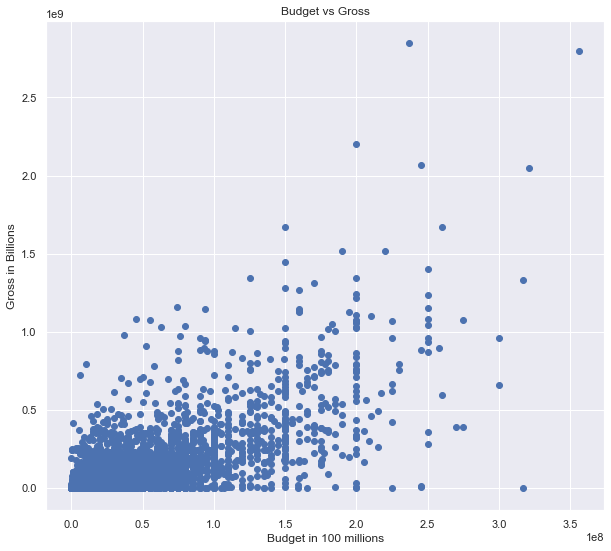

In [27]:
# correlation of Budget and gross
plt.figure(figsize = (10,9))
plt.scatter(x=  df["budget"], y = df.gross)
plt.title("Budget vs Gross")
plt.xlabel("Budget in 100 millions")
plt.ylabel("Gross in Billions")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

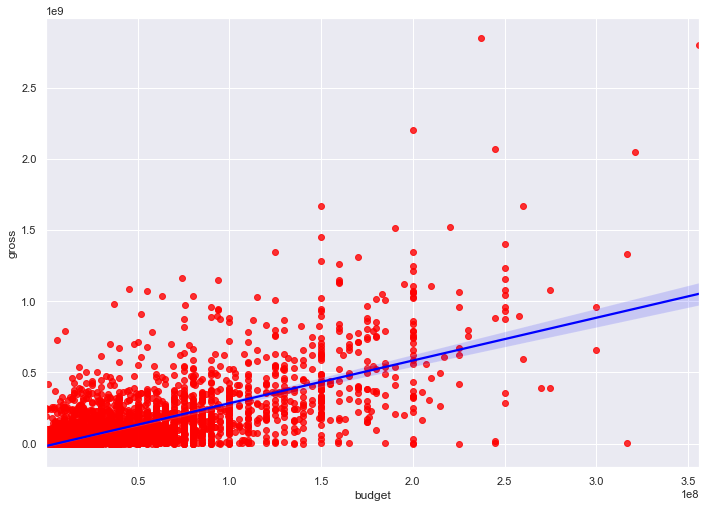

In [28]:
# correlation using seaborn
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=  df["budget"], y = df.gross, data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [35]:
# pearson correlation_matrix to check correlation among numerical columns
correlation_matrix = df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime,releaseYear
year,1.000000,0.098144,0.224021,0.336821,0.262560,0.120885,0.997405
score,0.098144,1.000000,0.393559,0.076119,0.177356,0.382547,0.105738
votes,0.224021,0.393559,1.000000,0.449108,0.632606,0.309444,0.219484
budget,0.336821,0.076119,0.449108,1.000000,0.702222,0.263729,0.330232
gross,0.262560,0.177356,0.632606,0.702222,1.000000,0.244847,0.255555
runtime,0.120885,0.382547,0.309444,0.263729,0.244847,1.000000,0.120715
releaseYear,0.997405,0.105738,0.219484,0.330232,0.255555,0.120715,1.000000


#### Budget has high correlation with gross, assumption is right

Text(0.5, 1.0, 'Correlation of important factors')

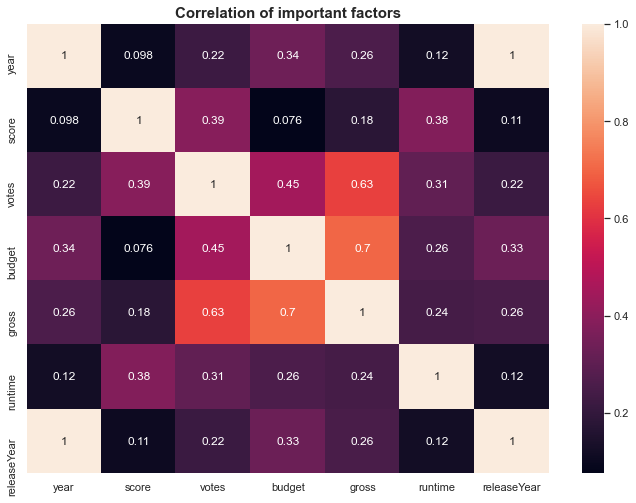

In [36]:
# creating heatmap using correlation_matrix
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation of important factors", fontsize=15, fontweight = "bold")